<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

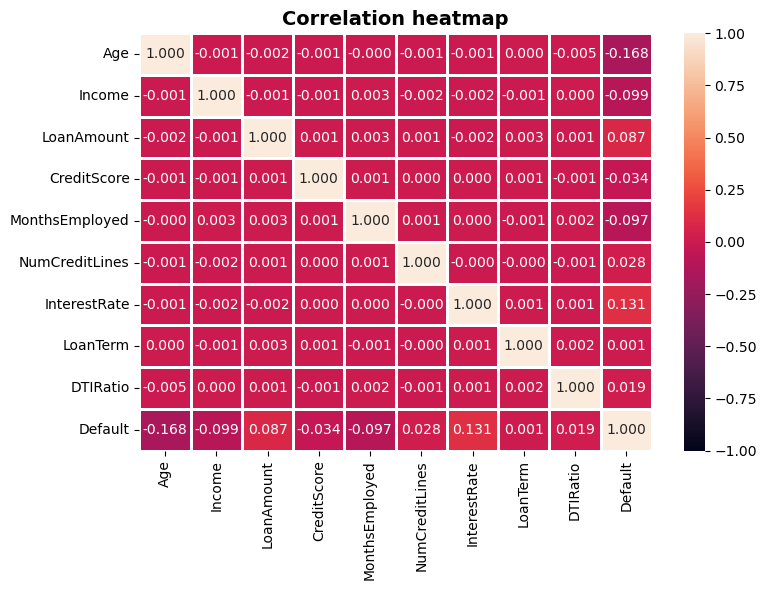

count    255347.00
mean      82499.30
std       38963.01
min       15000.00
25%       48825.50
50%       82466.00
75%      116219.00
max      149999.00
Name: Income, dtype: float64

count    255347.00
mean        574.26
std         158.90
min         300.00
25%         437.00
50%         574.00
75%         712.00
max         849.00
Name: CreditScore, dtype: float64
IncomeLevel
Very High Income        94565
Middle Income           66422
Below Average Income    66096
High Income             28261
Low Income                  3
Name: count, dtype: int64

CreditScoreLevel
Fair         93029
Average      92888
Very Good    45962
Excellent    23468
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmou

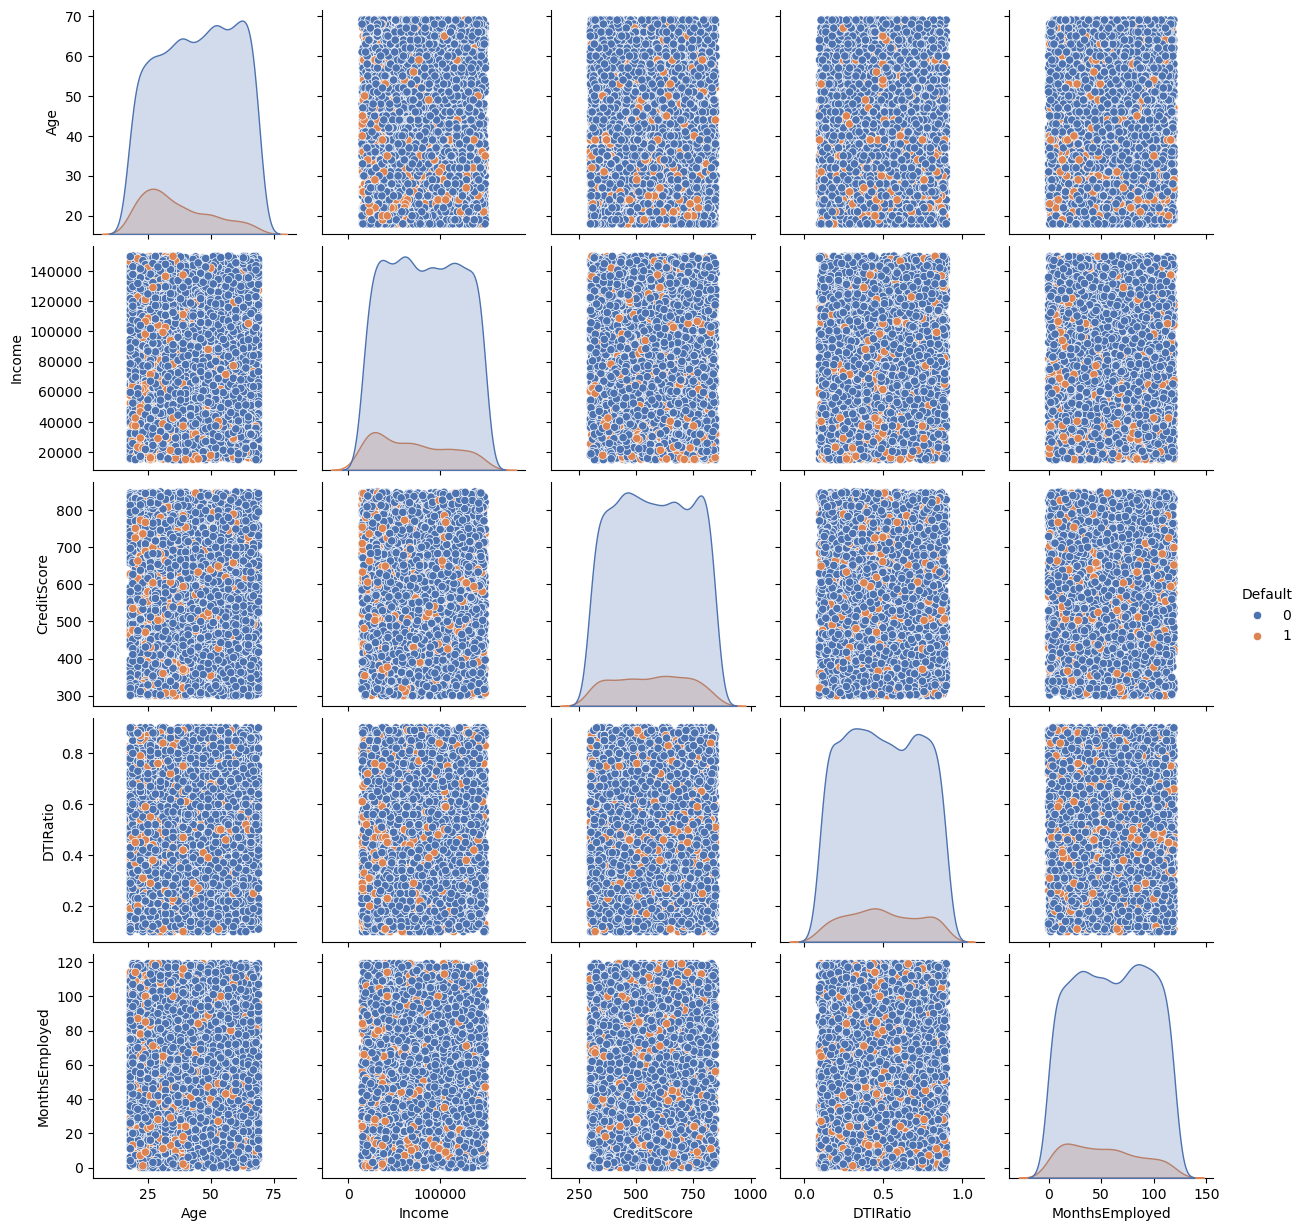

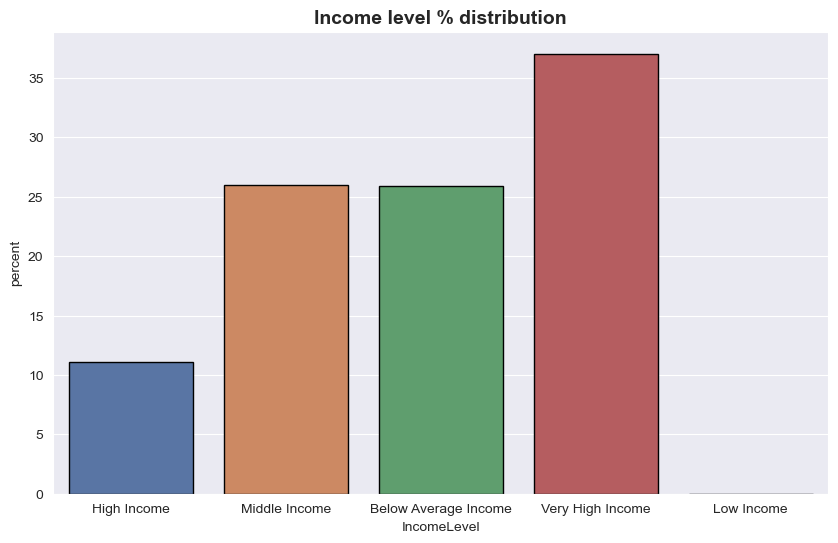

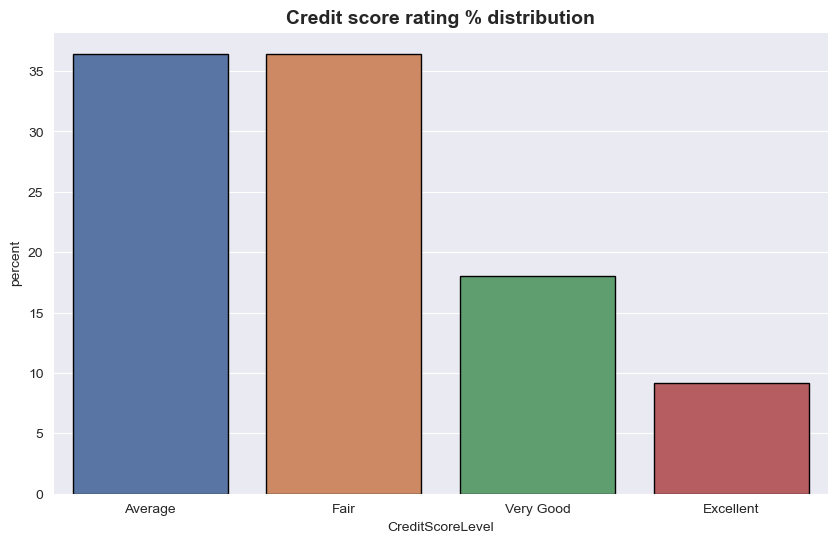

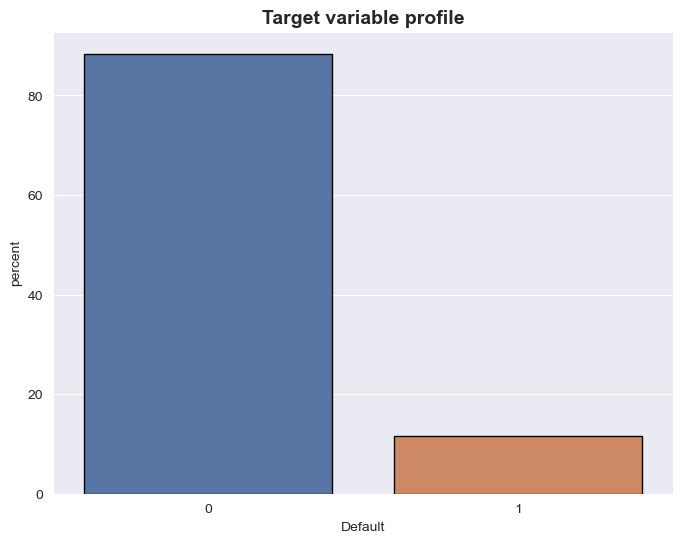

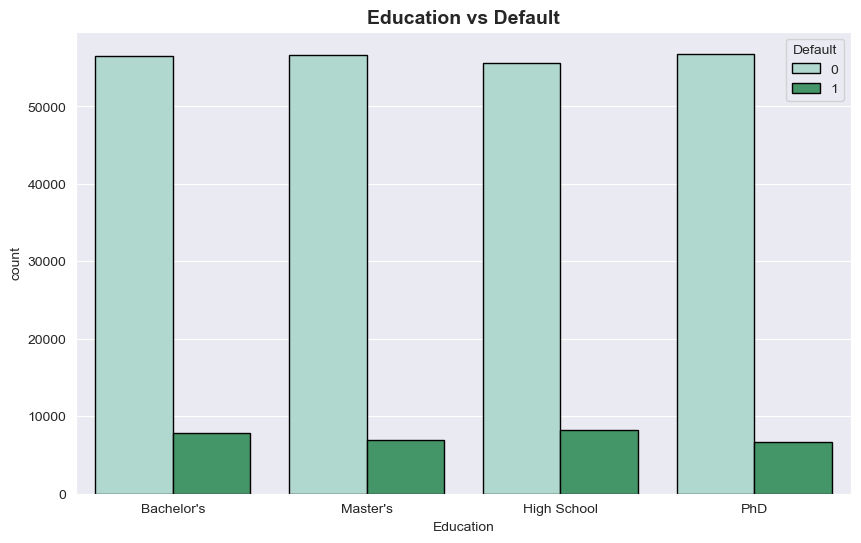

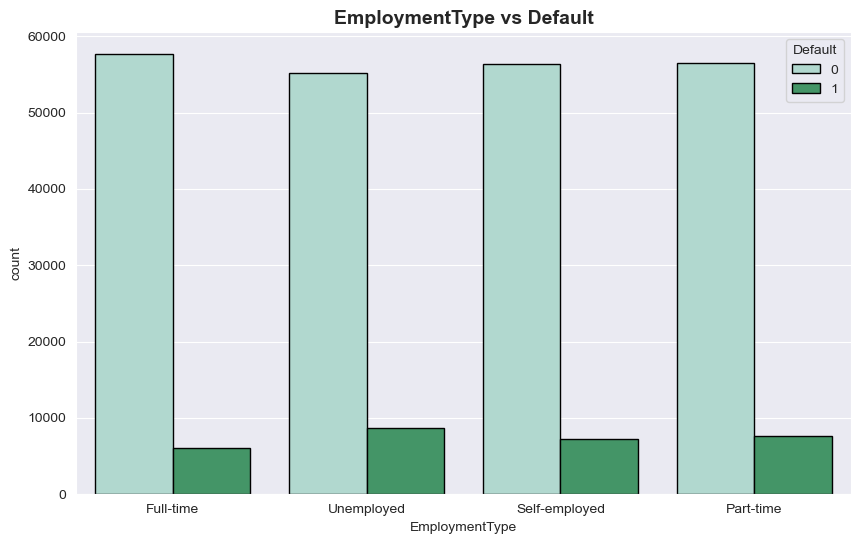

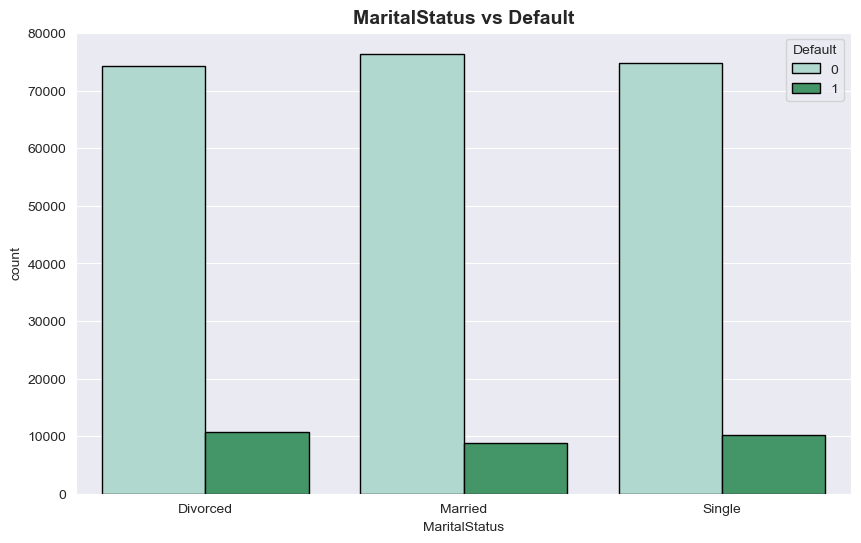

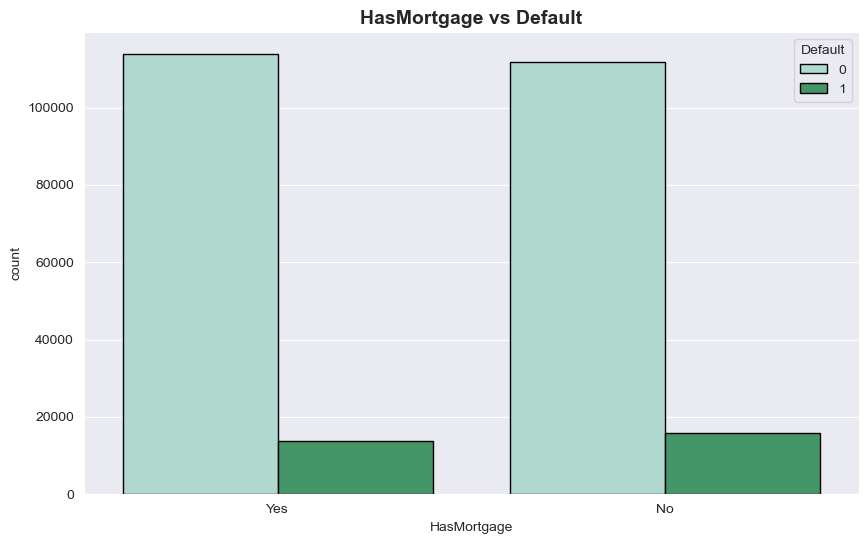

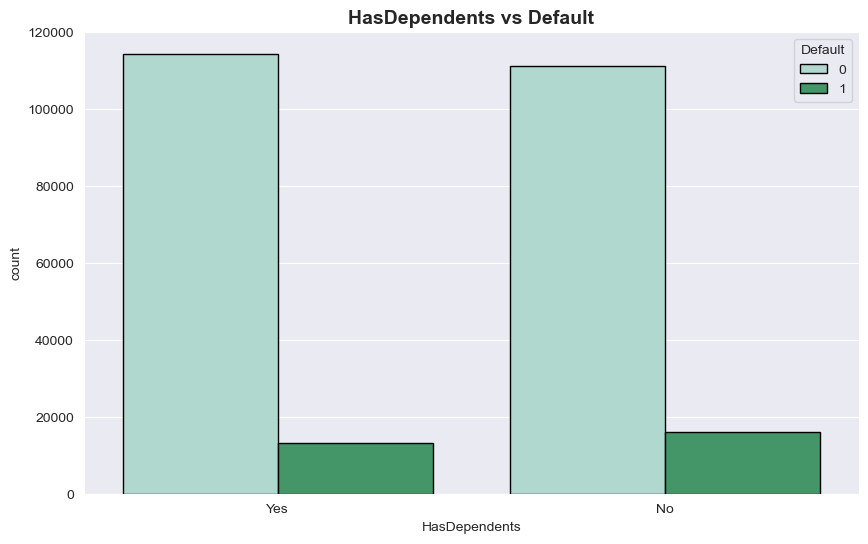

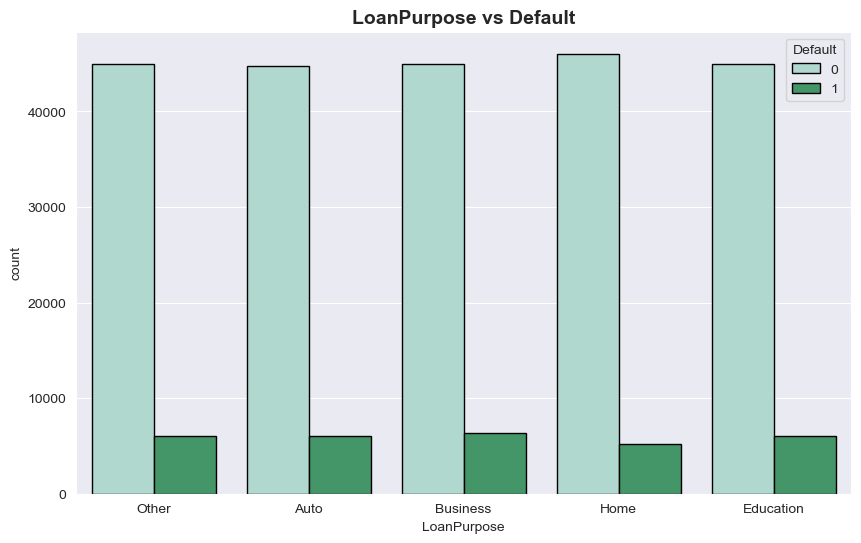

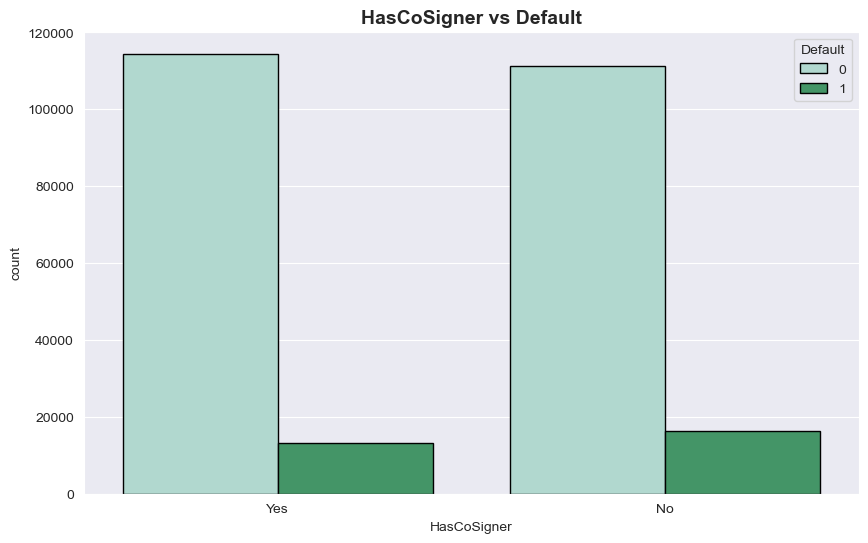

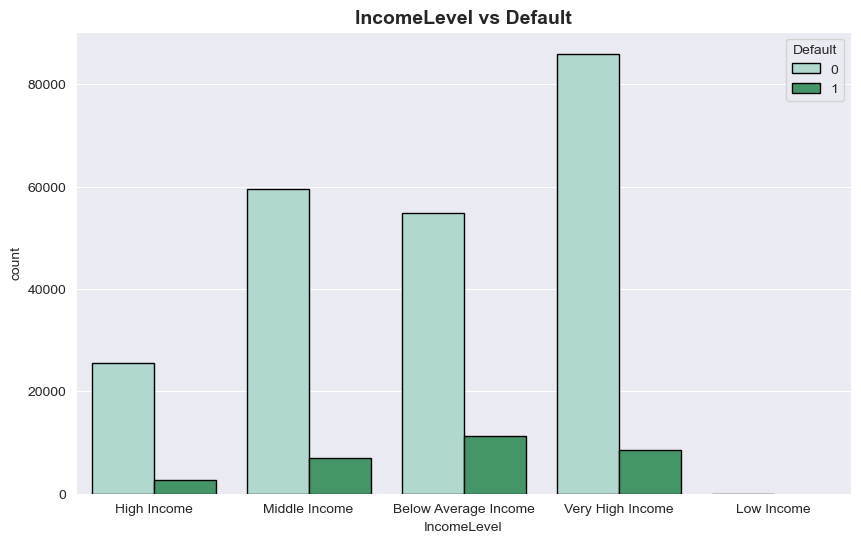

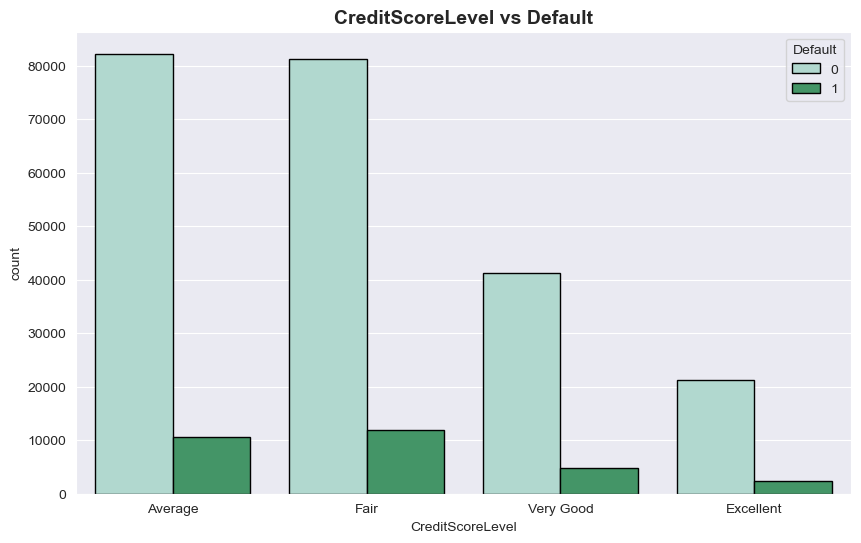

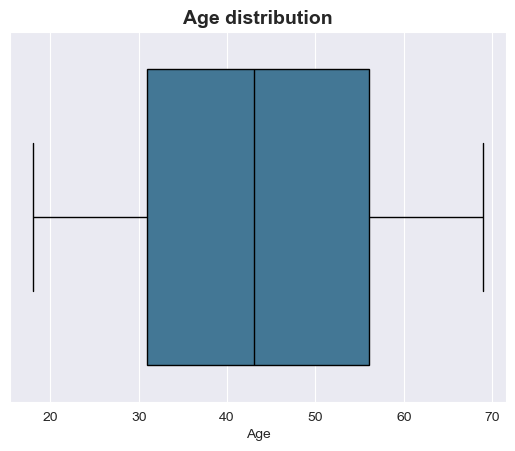

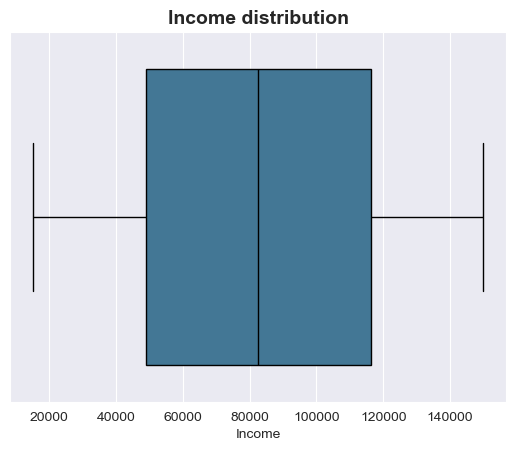

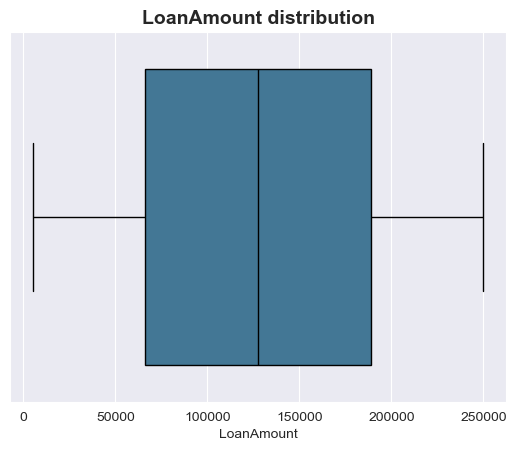

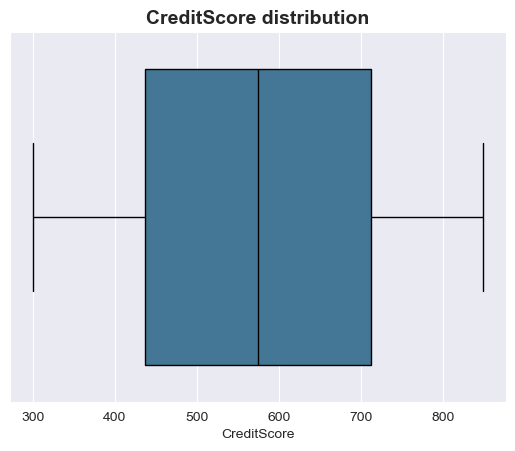

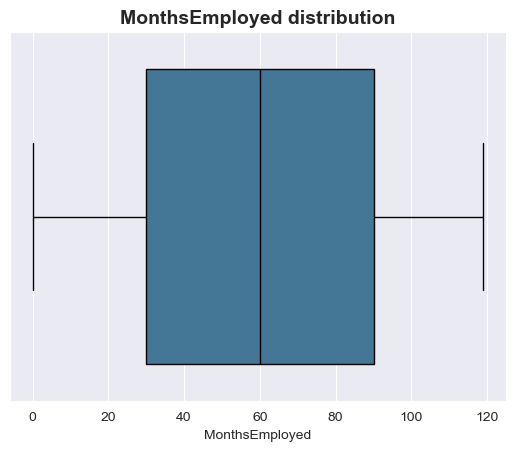

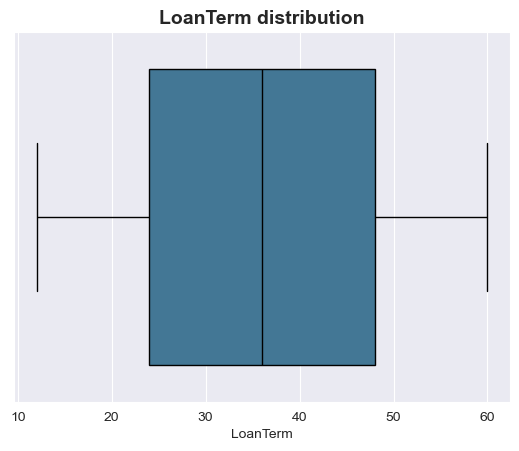

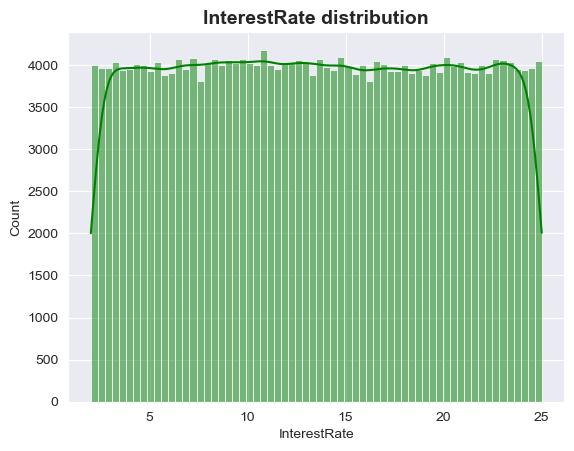

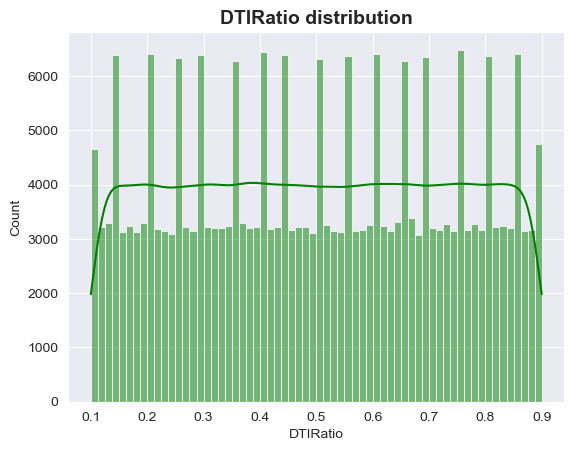

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmount        255347 non-null  int64  
 3   CreditScore       255347 non-null  int64  
 4   MonthsEmployed    255347 non-null  int64  
 5   NumCreditLines    255347 non-null  int64  
 6   InterestRate      255347 non-null  float64
 7   LoanTerm          255347 non-null  int64  
 8   DTIRatio          255347 non-null  float64
 9   Education         255347 non-null  object 
 10  EmploymentType    255347 non-null  object 
 11  MaritalStatus     255347 non-null  object 
 12  HasMortgage       255347 non-null  object 
 13  HasDependents     255347 non-null  object 
 14  LoanPurpose       255347 non-null  object 
 15  HasCoSigner       255347 non-null  object 
 16  Default     

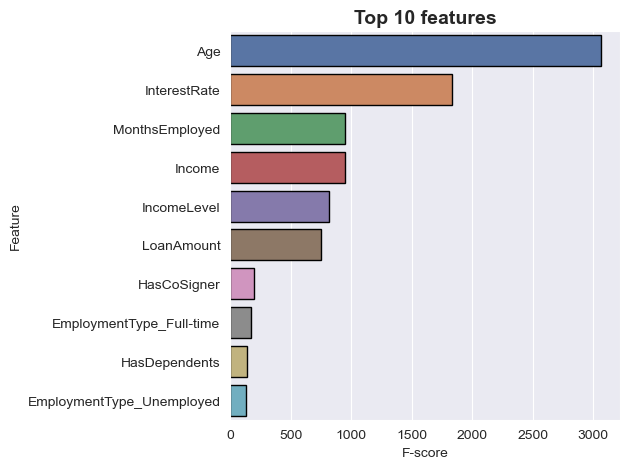

Cross validation f1 score is 0.658 and standard deviation is 0.004


<Figure size 800x600 with 0 Axes>

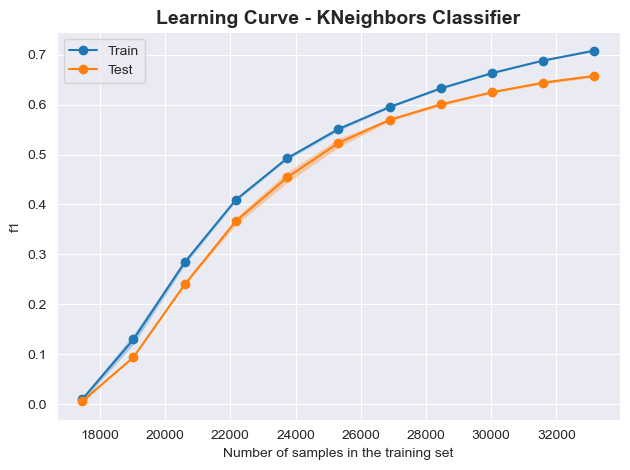

KNN score on test set: 0.65
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     67681
           1       0.20      0.66      0.31      8924

    accuracy                           0.65     76605
   macro avg       0.57      0.66      0.54     76605
weighted avg       0.85      0.65      0.71     76605



<Figure size 800x600 with 0 Axes>

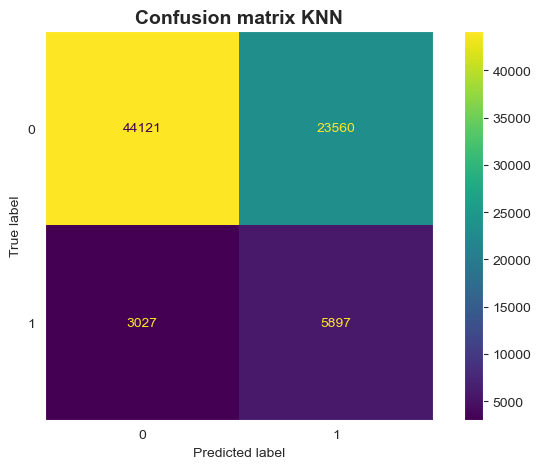

<Figure size 800x600 with 0 Axes>

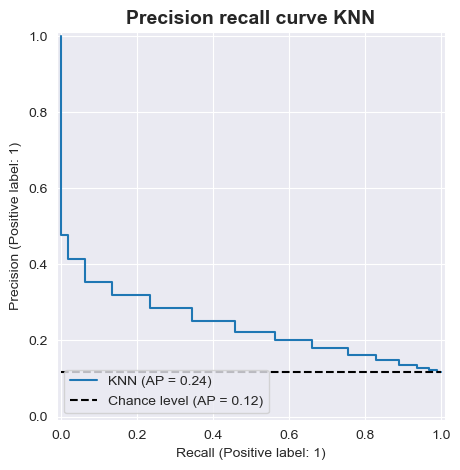

<Figure size 800x600 with 0 Axes>

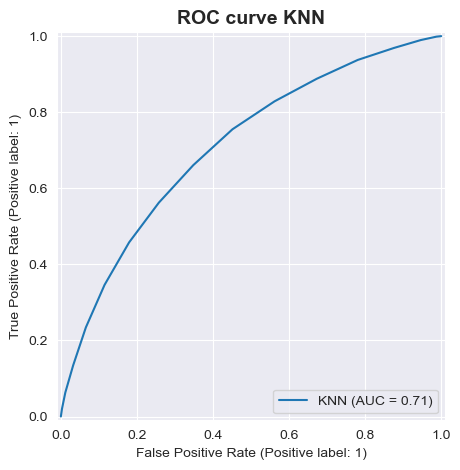

Cross validation f1 score is 0.66 and standard deviation is 0.006


<Figure size 800x600 with 0 Axes>

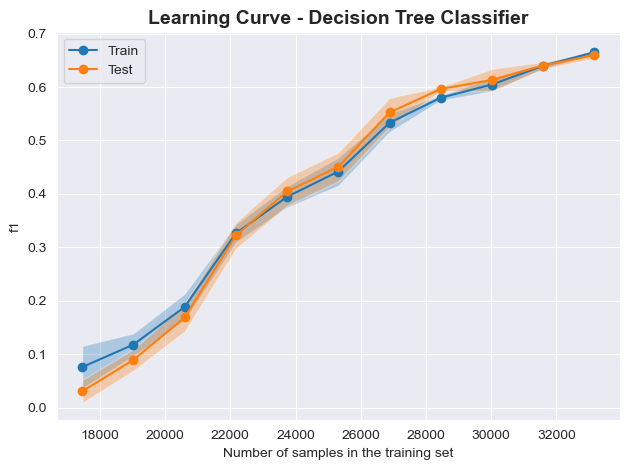

Tree score on test set: 0.66
              precision    recall  f1-score   support

           0       0.94      0.66      0.77     67681
           1       0.20      0.67      0.31      8924

    accuracy                           0.66     76605
   macro avg       0.57      0.66      0.54     76605
weighted avg       0.85      0.66      0.72     76605



<Figure size 800x600 with 0 Axes>

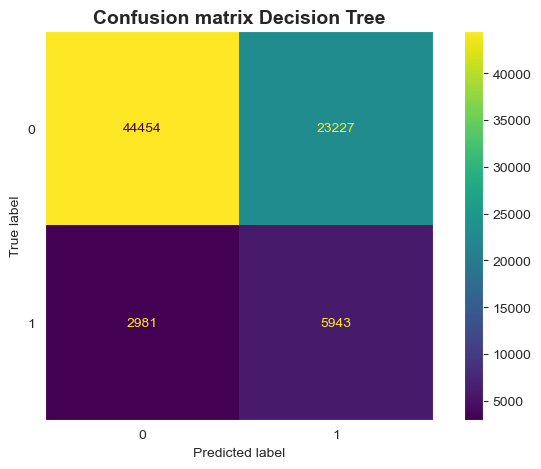

<Figure size 800x600 with 0 Axes>

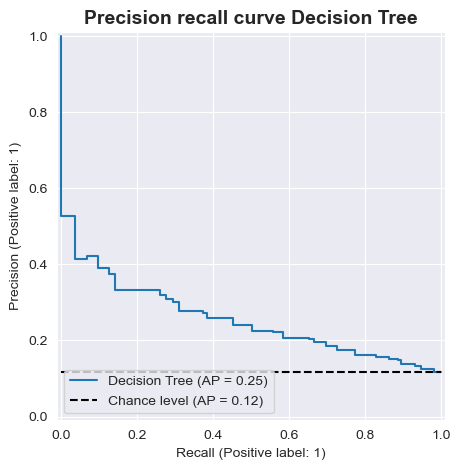

<Figure size 800x600 with 0 Axes>

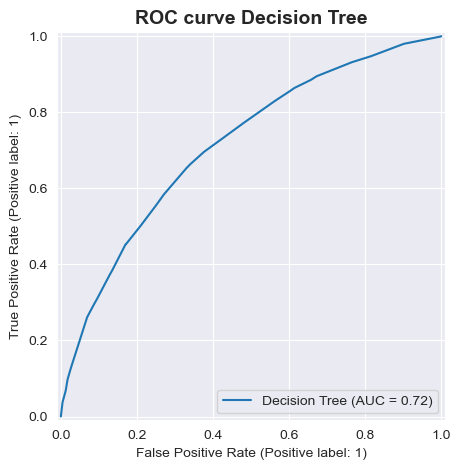

Cross validation f1 score is 0.672 and standard deviation is 0.002


<Figure size 800x600 with 0 Axes>

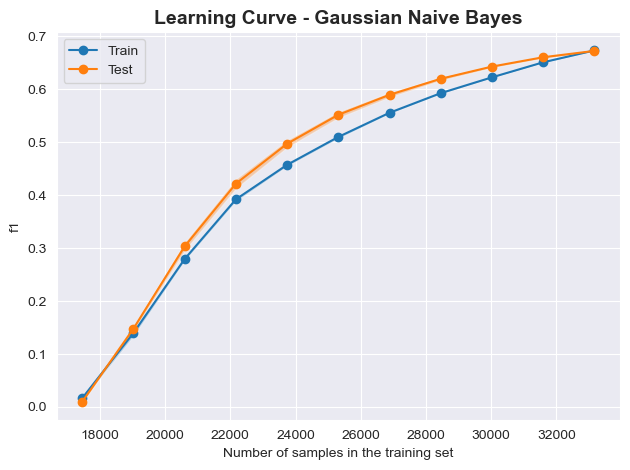

Gaussian Naive Bayes score on test set: 0.66
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     67681
           1       0.21      0.68      0.32      8924

    accuracy                           0.66     76605
   macro avg       0.57      0.67      0.55     76605
weighted avg       0.85      0.66      0.72     76605



<Figure size 800x600 with 0 Axes>

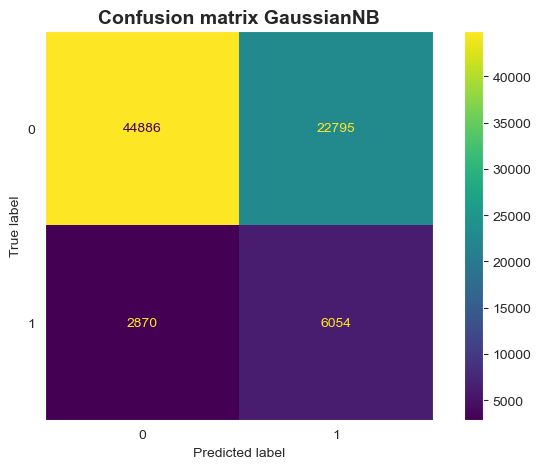

<Figure size 800x600 with 0 Axes>

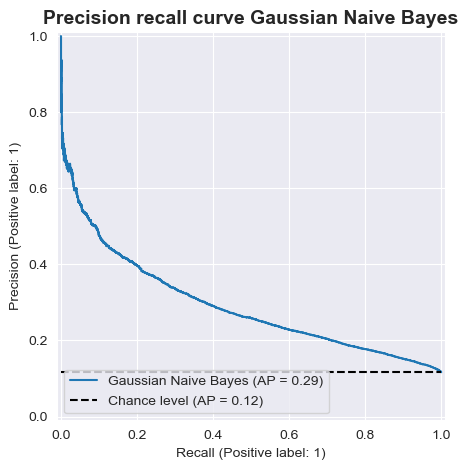

<Figure size 800x600 with 0 Axes>

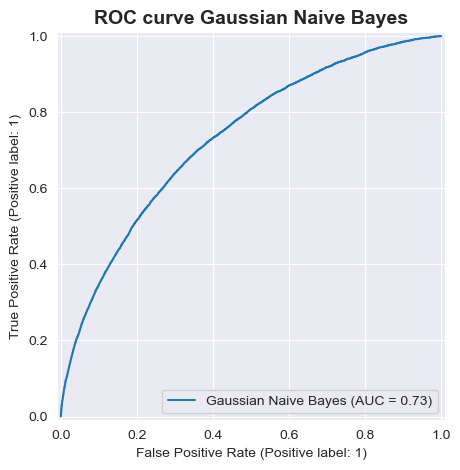

In [1]:
# Load model notebook
%run Loan_default_model.ipynb

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score

## Functions list

In [3]:
# Bagging classifier function
def bagging_model(estimator):
    bag = BaggingClassifier(
        estimator = estimator,
        n_estimators = 10,
        max_samples = 0.5,
        bootstrap = True,
        random_state = 42,
        n_jobs = -1
        
    )
    return bag

# Final metrics function
def get_metrics(actual, prediction, probability):
    return {
        'F1': f1_score(actual, prediction),
        'Precision': precision_score(actual, prediction),
        'Recall': recall_score(actual, prediction),
        'ROC AUC': roc_auc_score(actual, probability[:,1]),
        'PR AUC': average_precision_score(actual, probability[:,1])
    }

## Stacking

In [4]:
# Declare stacking classifier
estimator = [('knn', clf1), ('Tree', clf2), ('gnb', clf3)]
lr = LogisticRegression(class_weight = 'balanced', random_state = 42)

sclf = StackingClassifier(
    estimators = estimator,
    final_estimator = lr,
    stack_method = 'auto',
    cv = 5
)

fit_sclf = sclf.fit(X_train_sel, y_train_res)

In [5]:
# CV score - Stacking Classifier
cross_validation(sclf, X_train_sel, y_train_res)

Cross validation f1 score is 0.679 and standard deviation is 0.002


<Figure size 800x600 with 0 Axes>

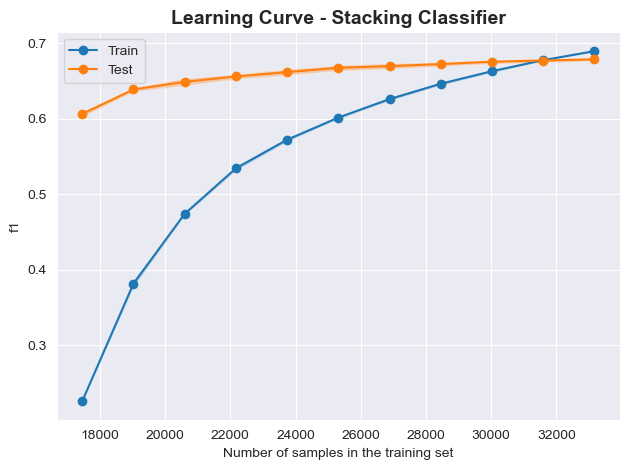

In [6]:
# Learning curve - Stacking Classifier
plot_learning_curve(sclf, X_train_sel, y_train_res, 'Stacking Classifier')

In [7]:
# Predict Stacking classifier on test data
sclf_predictor = predictor(fit_sclf, X_test_sel, y_test)
print(f'Stacking classifier score on test set: {round(sclf_predictor[2],2)}')

Stacking classifier score on test set: 0.67


In [8]:
# Classification report - Stacking Classifer
report(y_test, sclf_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.67      0.79     67681
           1       0.22      0.68      0.33      8924

    accuracy                           0.67     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.67      0.73     76605



<Figure size 800x600 with 0 Axes>

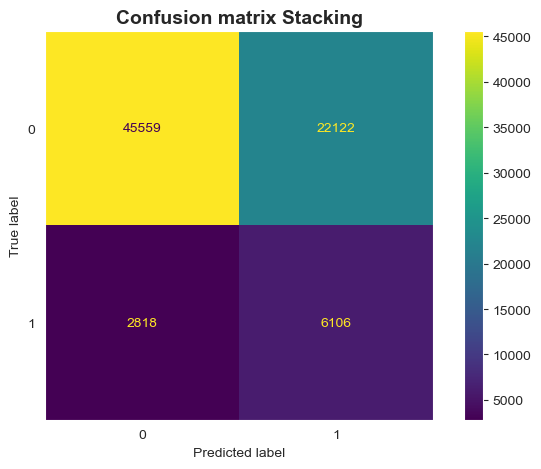

In [9]:
# Confusion matrix - Stacking classifier
plot_matrix(y_test, sclf_predictor[0], 'Stacking')

<Figure size 800x600 with 0 Axes>

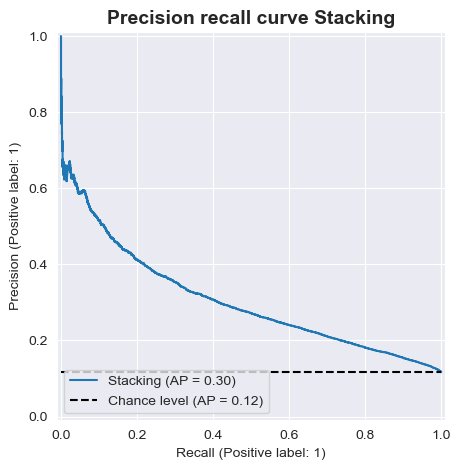

In [10]:
# PrecisionRecall plot - Stacking Classifier
plot_recall_precision(y_test, sclf_predictor[1][:,1], 'Stacking')

<Figure size 800x600 with 0 Axes>

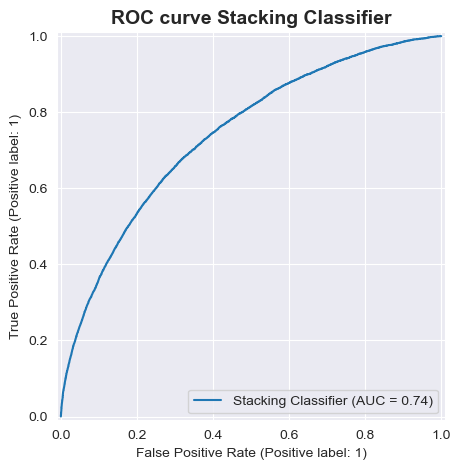

In [11]:
# ROC AUC curve plot - Stacking Classifier
plot_ROC(y_test, sclf_predictor[1][:,1], 'Stacking Classifier')

## Bagging - KNN

In [12]:
# Bagging on KNN model
bagging1 = bagging_model(clf1).fit(X_train_sel, y_train_res)

In [13]:
# CV score - Bagging KNN
cross_validation(bagging1, X_train_sel, y_train_res)

Cross validation f1 score is 0.666 and standard deviation is 0.004


<Figure size 800x600 with 0 Axes>

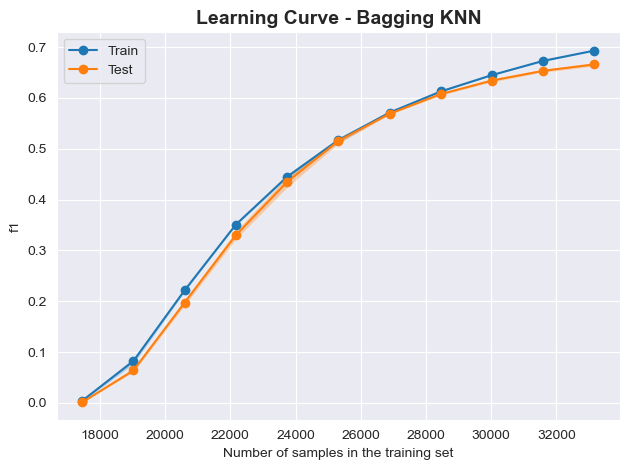

In [14]:
# Learning curve - Bagging KNN
plot_learning_curve(bagging1, X_train_sel, y_train_res, 'Bagging KNN')

In [15]:
# Predict Bagging KNN on test data
bagging1_predictor = predictor(bagging1, X_test_sel, y_test)
print(f'Bagging KNN score on test set: {round(bagging1_predictor[2],2)}')

Bagging KNN score on test set: 0.67


In [16]:
# Classification report - Bagging KNN
report(y_test, bagging1_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.66      0.78     67681
           1       0.21      0.67      0.32      8924

    accuracy                           0.67     76605
   macro avg       0.57      0.67      0.55     76605
weighted avg       0.85      0.67      0.72     76605



<Figure size 800x600 with 0 Axes>

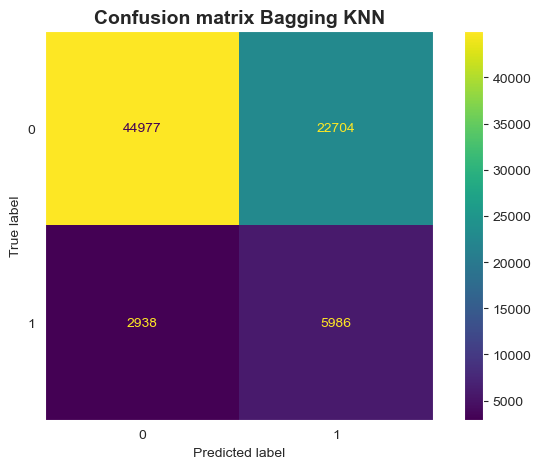

In [17]:
# Confusion matrix - Bagging KNN
plot_matrix(y_test, bagging1_predictor[0], 'Bagging KNN')

<Figure size 800x600 with 0 Axes>

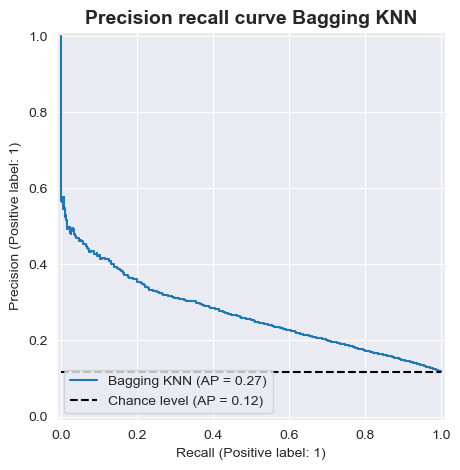

In [18]:
# PrecisionRecall plot - Bagging KNN
plot_recall_precision(y_test, bagging1_predictor[1][:,1], 'Bagging KNN')

<Figure size 800x600 with 0 Axes>

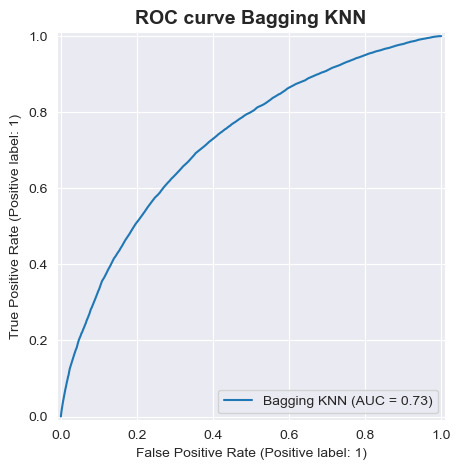

In [19]:
# ROC AUC curve plot - Bagging KNN
plot_ROC(y_test, bagging1_predictor[1][:,1], 'Bagging KNN')

## Bagging - Decision Tree

In [20]:
#Bagging on Decision Tree
bagging2 = bagging_model(clf2).fit(X_train_sel, y_train_res)

In [21]:
# CV score - Bagging Decision Tree
cross_validation(bagging2, X_train_sel, y_train_res)

Cross validation f1 score is 0.666 and standard deviation is 0.006


<Figure size 800x600 with 0 Axes>

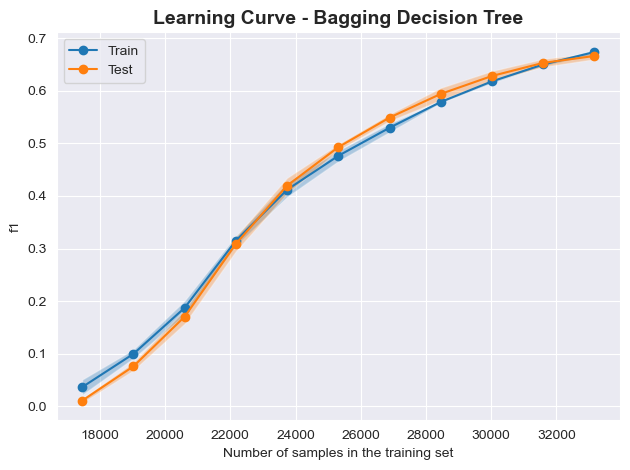

In [22]:
# Learning curve - Bagging Decision Tree
plot_learning_curve(bagging2, X_train_sel, y_train_res, 'Bagging Decision Tree')

In [23]:
# Predict Bagging Decision Tree on test data
bagging2_predictor = predictor(bagging2, X_test_sel, y_test)
print(f'Bagging Decision Tree score on test set: {round(bagging2_predictor[2],2)}')

Bagging Decision Tree score on test set: 0.68


In [24]:
# Classification report - Bagging Decision Tree
report(y_test, bagging2_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.66      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.67      0.56     76605
weighted avg       0.85      0.68      0.74     76605



<Figure size 800x600 with 0 Axes>

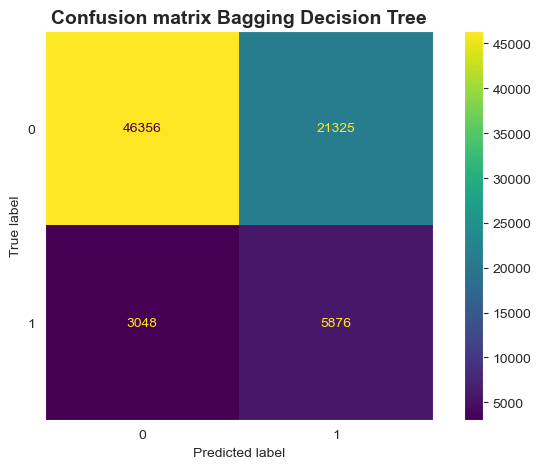

In [25]:
# Confusion matrix - Bagging Decision Tree
plot_matrix(y_test, bagging2_predictor[0], 'Bagging Decision Tree')

<Figure size 800x600 with 0 Axes>

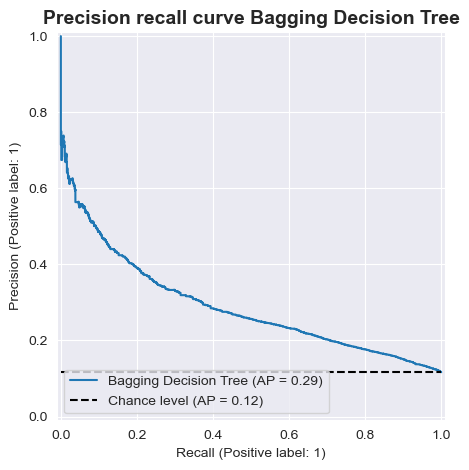

In [26]:
# PrecisionRecall plot - Bagging Decision Tree
plot_recall_precision(y_test, bagging2_predictor[1][:,1], 'Bagging Decision Tree')

<Figure size 800x600 with 0 Axes>

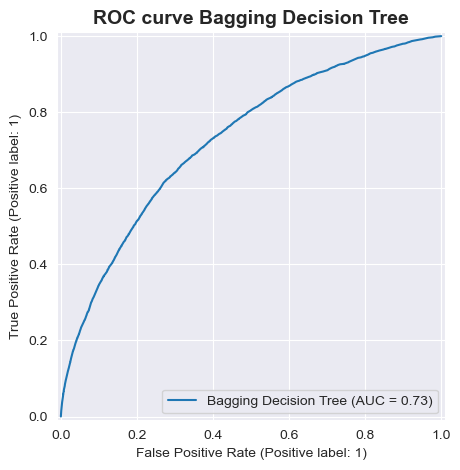

In [27]:
# ROC AUC curve plot - Bagging Decision Tree
plot_ROC(y_test, bagging2_predictor[1][:,1], 'Bagging Decision Tree')

## Bagging - Gaussian Naive Bayes

In [28]:
# Bagging on GaussianNB
bagging3 = bagging_model(clf3).fit(X_train_sel, y_train_res)

In [29]:
# CV score - GaussianNB
cross_validation(bagging3, X_train_sel, y_train_res)

Cross validation f1 score is 0.67 and standard deviation is 0.001


<Figure size 800x600 with 0 Axes>

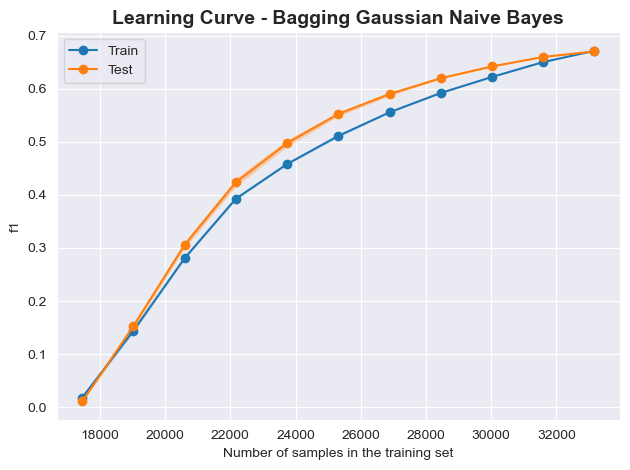

In [30]:
# Learning curve - Bagging GaussianNB
plot_learning_curve(bagging3, X_train_sel, y_train_res, 'Bagging Gaussian Naive Bayes')

In [31]:
# Predict Bagging GaussianNB on test data
bagging3_predictor = predictor(bagging3, X_test_sel, y_test)
print(f'Bagging GaussianNB score on test set: {round(bagging3_predictor[2],2)}')

Bagging GaussianNB score on test set: 0.67


In [32]:
# Classification report - Bagging GaussianNB
report(y_test, bagging3_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     67681
           1       0.21      0.67      0.32      8924

    accuracy                           0.67     76605
   macro avg       0.58      0.67      0.55     76605
weighted avg       0.85      0.67      0.73     76605



<Figure size 800x600 with 0 Axes>

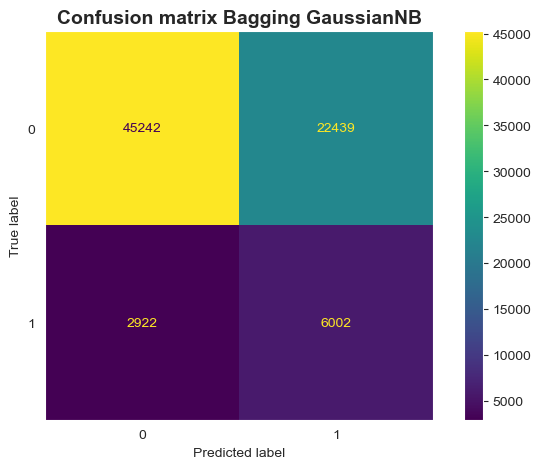

In [33]:
# Confusion matrix - Bagging GaussianNB
plot_matrix(y_test, bagging3_predictor[0], 'Bagging GaussianNB')

<Figure size 800x600 with 0 Axes>

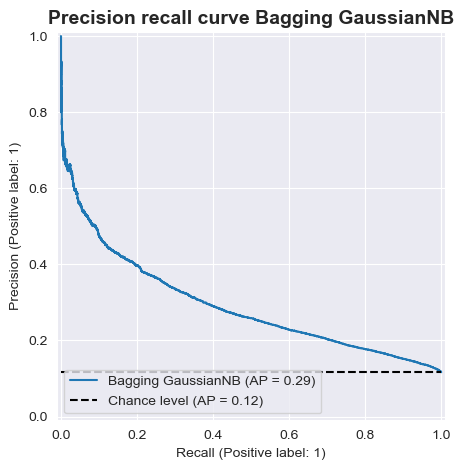

In [34]:
# PrecisionRecall plot - Bagging GaussianNB
plot_recall_precision(y_test, bagging3_predictor[1][:,1], 'Bagging GaussianNB')

<Figure size 800x600 with 0 Axes>

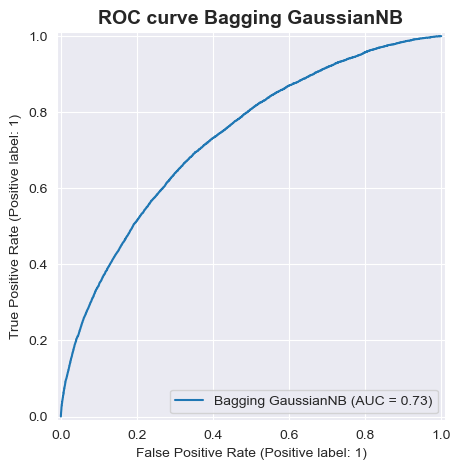

In [35]:
# ROC AUC curve plot - Bagging GaussianNB
plot_ROC(y_test, bagging3_predictor[1][:,1], 'Bagging GaussianNB')

## Boosting

In [36]:
# Declare boosting model - HistGradientBoostingClassifier
boost_list = {
    'max_depth': [2, 3],
    'max_iter': [300, 500],
    'learning_rate': [0.05, 0.01]
} 

hist_boost = HistGradientBoostingClassifier(
    random_state = 42, 
    class_weight = 'balanced',
)

# Fit model to training set
clf4 = model_search(hist_boost, boost_list, X_train_sel, y_train_res)
fit_clf4 = clf4.fit(X_train_sel, y_train_res)

In [37]:
# CV score - Boosting
cross_validation(clf4, X_train_sel, y_train_res)

Cross validation f1 score is 0.682 and standard deviation is 0.005


<Figure size 800x600 with 0 Axes>

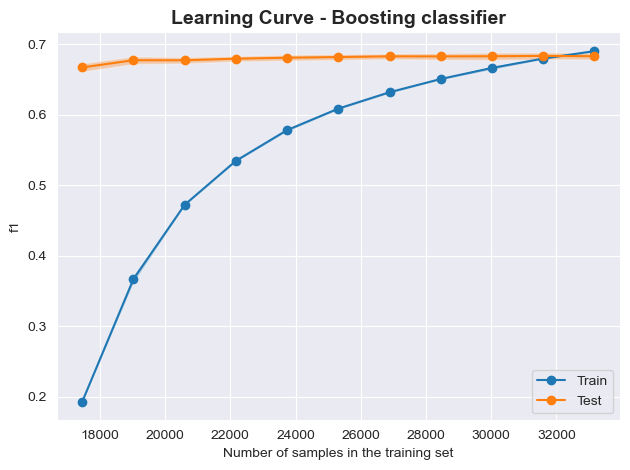

In [38]:
# Learning curve - Boosting classifier
plot_learning_curve(clf4, X_train_sel, y_train_res, 'Boosting classifier')

In [39]:
# Predict Stacking classifier on test data
clf4_predictor = predictor(fit_clf4, X_test_sel, y_test)
print(f'Boosting classifier score on test set: {round(clf4_predictor[2],2)}')

Boosting classifier score on test set: 0.68


In [40]:
# Classification report - Boosting classifier
report(y_test, clf4_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.69      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.74     76605



<Figure size 800x600 with 0 Axes>

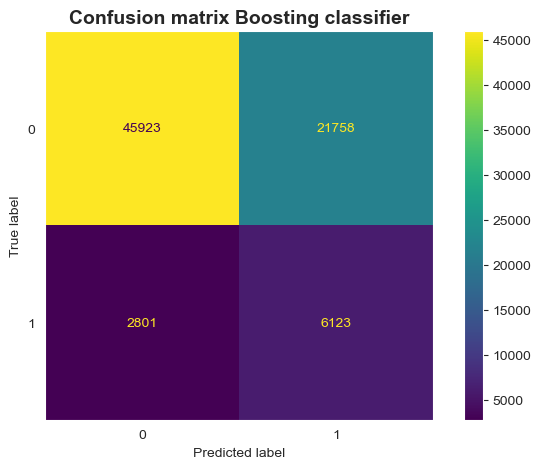

In [41]:
# Confusion matrix - Boosting classifier
plot_matrix(y_test, clf4_predictor[0], 'Boosting classifier')

<Figure size 800x600 with 0 Axes>

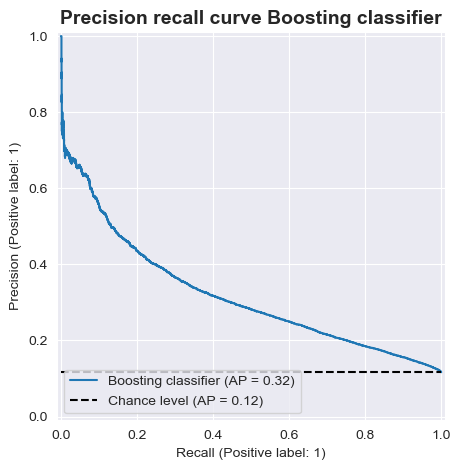

In [42]:
# PrecisionRecall plot - Boosting classifier
plot_recall_precision(y_test, clf4_predictor[1][:,1], 'Boosting classifier')

<Figure size 800x600 with 0 Axes>

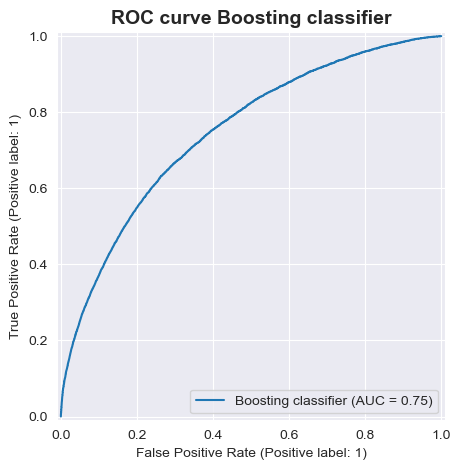

In [43]:
# ROC AUC curve plot - Boosting classifer
plot_ROC(y_test, clf4_predictor[1][:,1], 'Boosting classifier')

## Random Forest

In [44]:
# Declare Random forest classifier
forest_list = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 7, 10],
    'max_features': ['sqrt', 'log2',]
} 

forest = RandomForestClassifier(
    random_state = 42, 
    class_weight = 'balanced',
)

# Fit model to training set
clf5 = model_search(forest, forest_list, X_train_sel, y_train_res)
fit_clf5 = clf5.fit(X_train_sel, y_train_res)

In [45]:
# CV score - Random Forest
cross_validation(clf5, X_train_sel, y_train_res)

Cross validation f1 score is 0.679 and standard deviation is 0.003


<Figure size 800x600 with 0 Axes>

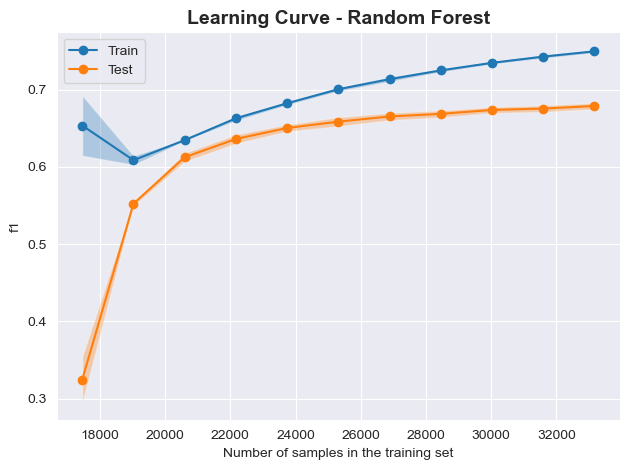

In [46]:
# Learning curve - Random Forest
plot_learning_curve(clf5, X_train_sel, y_train_res, 'Random Forest')

In [47]:
# Predict Random forest classifier on test data
clf5_predictor = predictor(fit_clf5, X_test_sel, y_test)
print(f'Random forest score on test set: {round(clf5_predictor[2],2)}')

Random forest score on test set: 0.68


In [48]:
# Classification report - Random forest
report(y_test, clf5_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.68      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.74     76605



<Figure size 800x600 with 0 Axes>

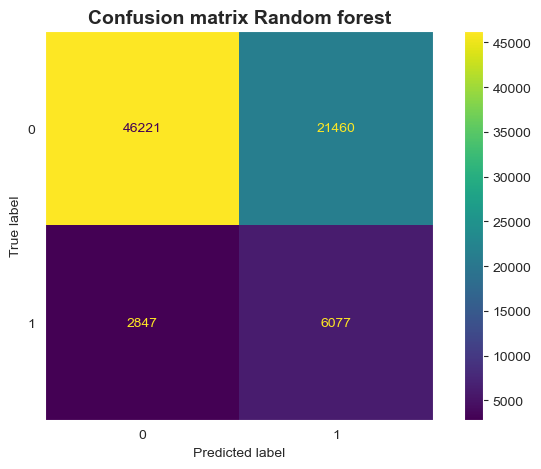

In [49]:
# Confusion matrix - Random forest
plot_matrix(y_test, clf5_predictor[0], 'Random forest')

<Figure size 800x600 with 0 Axes>

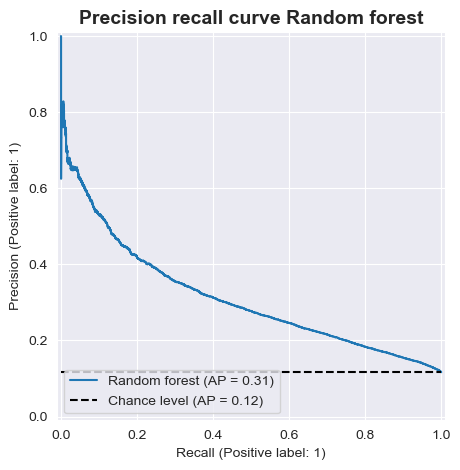

In [50]:
# PrecisionRecall plot - Random Forest
plot_recall_precision(y_test, clf5_predictor[1][:,1], 'Random forest')

<Figure size 800x600 with 0 Axes>

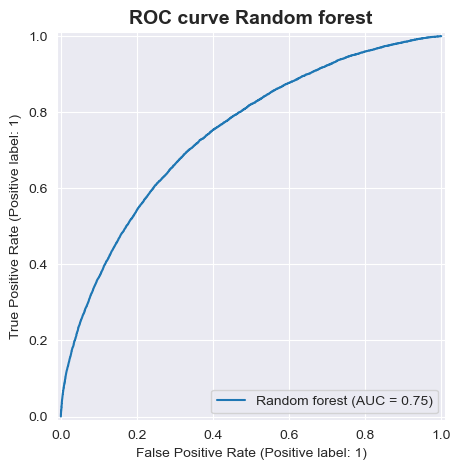

In [51]:
# ROC AUC curve plot - Random forest classifer
plot_ROC(y_test, clf5_predictor[1][:,1], 'Random forest')

## Final Evaluation

In [52]:
results = {
    'KNN': get_metrics(y_test, knn_predictor[0], knn_predictor[1]),
    'Decision Tree': get_metrics(y_test, tree_predictor[0], tree_predictor[1]),
    'Naive Bayes': get_metrics(y_test, gnb_predictor[0], gnb_predictor[1]),
    'Bagging KNN': get_metrics(y_test, bagging1_predictor[0], bagging1_predictor[1]),
    'Bagging Tree': get_metrics(y_test, bagging2_predictor[0], bagging2_predictor[1]),
    'Bagging NB': get_metrics(y_test, bagging3_predictor[0], bagging3_predictor[1]),
    'Stacking': get_metrics(y_test, sclf_predictor[0], sclf_predictor[1]),
    'Boosting': get_metrics(y_test, clf4_predictor[0], clf4_predictor[1]),
    'Random Forest': get_metrics(y_test, clf5_predictor[0], clf5_predictor[1])
}

final_results_df = pd.DataFrame(results).T.round(3)
final_results_df.style.highlight_max(color = 'lightgreen', axis = 0)

In [53]:
# Calculate permutation importance on test set
result = permutation_importance(
    clf4,              
    X_test_sel,        
    y_test,            
    n_repeats = 10,
    random_state = 42,
    scoring = 'f1'
)

original_feature_names = list(X.columns)
selected_names = [name for name, keep in zip(original_feature_names, mask) if keep]

# Importance dataframe
importance_df = pd.DataFrame({
    'Feature': selected_names,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by = 'Importance Mean', ascending = False)

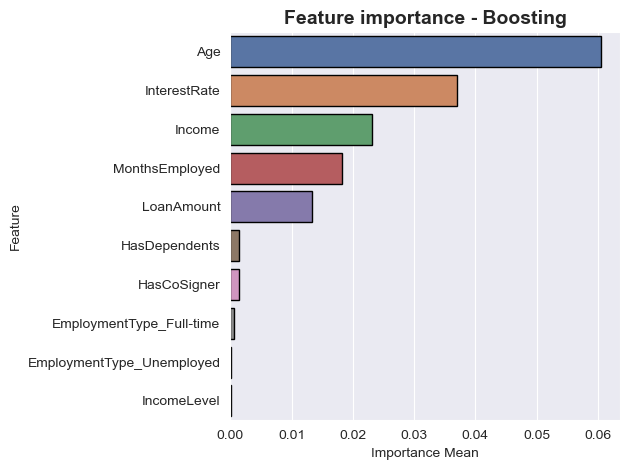

In [54]:
# Plot the results of feature importance
sns.barplot(
    data = importance_df,
    x = 'Importance Mean',
    y = 'Feature',
    edgecolor = 'black',
    palette = 'deep'
)
plt.title('Feature importance - Boosting', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.savefig('Feature importance.jpeg', bbox_inches = 'tight')
plt.show()

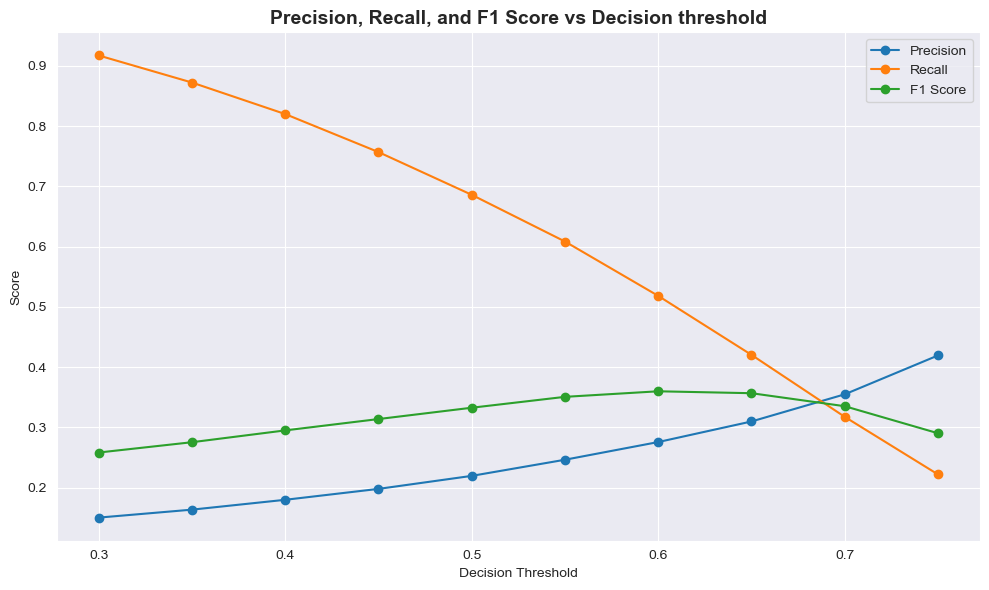

In [61]:
# Decison threshold
thresholds = np.arange(0.3, 0.8, 0.05)

# Initialise empty lists
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred = (clf4_predictor[1][:,1] >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

plt.figure(figsize = (10, 6))
plt.plot(thresholds, precisions, label = 'Precision', marker = 'o')
plt.plot(thresholds, recalls, label = 'Recall', marker = 'o')
plt.plot(thresholds, f1s, label = 'F1 Score', marker='o')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Decision threshold', fontweight = 'bold', fontsize = 14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Decision threshold.jpeg', bbox_inches = 'tight')
plt.show()